# Лабораторная работа №1
### Дьячков Вадим, 33501/4

### Инициализация окружения

In [1]:
%matplotlib inline
import numpy as np
import itertools
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, train_test_split
from sklearn.datasets import load_digits
from scipy.ndimage.interpolation import rotate, shift

np.random.seed(42)
sns.set(font_scale=1.25)

BLUE = '#0074D9'
RED = '#FF4136'

PIC_NUM = 1
def save():
    global PIC_NUM
    plt.savefig('../img/' + str(PIC_NUM), bbox_inches='tight')
    PIC_NUM += 1

## №1. Крестики-нолики

### Задание 1

$y = f1(x)$

$x = [x_1, x_2]$, $x_i \in \{1, 2, 3, 4\}$

$y_i \in \{0, 1\}$

In [2]:
grid = np.array([['O' if np.random.random() > 0.5 else 'X' for i in range(4)] for j in range(4)])
grid

array([['X', 'O', 'O', 'O'],
       ['X', 'X', 'X', 'O'],
       ['O', 'O', 'X', 'O'],
       ['O', 'X', 'X', 'X']], 
      dtype='<U1')

In [3]:
def fun(x):
    x = np.array(x)
    if len(x.shape) == 1:
        return grid[x[0] - 1, x[1] - 1]
    else:
        return np.array([fun(xi) for xi in x])[np.newaxis].T

In [4]:
fun(np.array([1, 2])), fun([4, 4])

('O', 'X')

### Задание 2

In [5]:
P = np.array(list(itertools.product([1, 2, 3, 4], repeat=2)))
T = fun(P)

print('x1 x2    y')
for i in range(len(P)):
    print(P[i], '->', T[i][0])

x1 x2    y
[1 1] -> X
[1 2] -> O
[1 3] -> O
[1 4] -> O
[2 1] -> X
[2 2] -> X
[2 3] -> X
[2 4] -> O
[3 1] -> O
[3 2] -> O
[3 3] -> X
[3 4] -> O
[4 1] -> O
[4 2] -> X
[4 3] -> X
[4 4] -> X


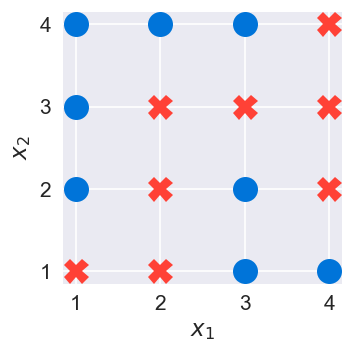

In [6]:
plt.figure(figsize=(3, 3), dpi=120)
for i in range(len(P)):
    x1, x2 = P[i]
    y = T[i][0]
    m = 'X' if y == 'X' else 'o'
    c = BLUE if y == 'O' else RED
    plt.plot(x1, x2, m, markersize=15, color=c)
plt.xticks([1, 2, 3, 4])
plt.yticks([1, 2, 3, 4])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
save()
plt.show()

## №2. Логическая функция 5 переменных

### Задание 1

$y = f2(x)$

$x = [x_1, x_2, x_3, x_4, x_5]$, $x_i \in \{0, 1\}$

$y_i \in \{0, 1\}$

In [7]:
grid = {'{0:05b}'.format(i): 0 if np.random.random() > 0.25 else 1 
        for i in range(32)}

In [8]:
def fun(x):
    x = np.array(x)
    if len(x.shape) == 1:
        return grid[''.join([str(i) for i in x])]
    else:
        return np.array([fun(xi) for xi in x])[np.newaxis].T

In [9]:
grid

{'00000': 0,
 '00001': 0,
 '00010': 0,
 '00011': 0,
 '00100': 0,
 '00101': 1,
 '00110': 0,
 '00111': 0,
 '01000': 0,
 '01001': 0,
 '01010': 1,
 '01011': 0,
 '01100': 0,
 '01101': 1,
 '01110': 0,
 '01111': 1,
 '10000': 1,
 '10001': 0,
 '10010': 0,
 '10011': 0,
 '10100': 0,
 '10101': 1,
 '10110': 0,
 '10111': 0,
 '11000': 1,
 '11001': 0,
 '11010': 1,
 '11011': 0,
 '11100': 0,
 '11101': 0,
 '11110': 0,
 '11111': 0}

In [10]:
fun([1, 1, 1, 1, 0]), fun([1, 1, 0, 1, 0])

(0, 1)

### Задание 2

In [11]:
P = np.array(list(itertools.product([0, 1], repeat=5)))
T = fun(P)

In [12]:
for i in range(len(P)):
    print(P[i], '->', T[i][0])

[0 0 0 0 0] -> 0
[0 0 0 0 1] -> 0
[0 0 0 1 0] -> 0
[0 0 0 1 1] -> 0
[0 0 1 0 0] -> 0
[0 0 1 0 1] -> 1
[0 0 1 1 0] -> 0
[0 0 1 1 1] -> 0
[0 1 0 0 0] -> 0
[0 1 0 0 1] -> 0
[0 1 0 1 0] -> 1
[0 1 0 1 1] -> 0
[0 1 1 0 0] -> 0
[0 1 1 0 1] -> 1
[0 1 1 1 0] -> 0
[0 1 1 1 1] -> 1
[1 0 0 0 0] -> 1
[1 0 0 0 1] -> 0
[1 0 0 1 0] -> 0
[1 0 0 1 1] -> 0
[1 0 1 0 0] -> 0
[1 0 1 0 1] -> 1
[1 0 1 1 0] -> 0
[1 0 1 1 1] -> 0
[1 1 0 0 0] -> 1
[1 1 0 0 1] -> 0
[1 1 0 1 0] -> 1
[1 1 0 1 1] -> 0
[1 1 1 0 0] -> 0
[1 1 1 0 1] -> 0
[1 1 1 1 0] -> 0
[1 1 1 1 1] -> 0


## №3. Разбиение плоскости на 2 класса

### Задание 1

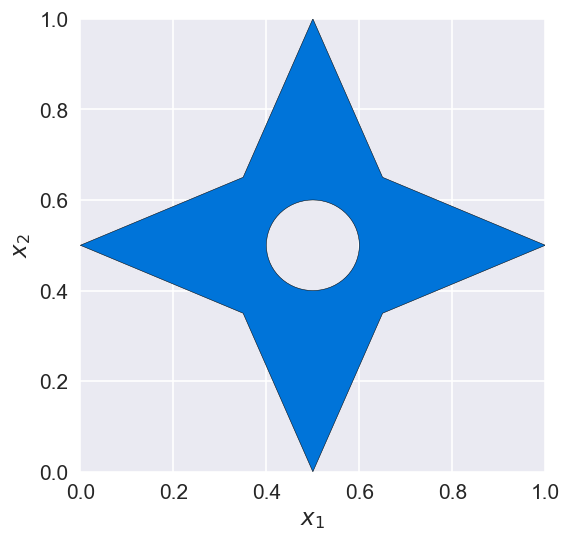

In [13]:
fig = plt.figure(figsize=(5, 5), dpi=120)
circle = Point(0.5, 0.5).buffer(0.1)
polygon = Polygon([(0, 0.5), (0.35, 0.65), (0.5, 1), (0.65, 0.65), (1, 0.5), 
                   (0.65, 0.35), (0.5, 0), (0.35, 0.35), (0, 0.5)])
polygon = polygon.difference(circle)

ax = fig.add_subplot(111)
ax.add_patch(PolygonPatch(polygon, fc=BLUE))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
save()
plt.show()

In [14]:
def fun(x):
    x = np.array(x)
    if len(x.shape) == 1:
        point = Point(x[0], x[1])
        return 1 if polygon.contains(point) else 0
    else:
        return np.array([fun(xi) for xi in x])[np.newaxis].T

In [15]:
fun([0.5, 0.5]), fun([0.2, 0.2]), fun([0.5, 0.3]), fun([0.2, 0.5])

(0, 0, 1, 1)

### Задание 2

In [16]:
X = np.linspace(0, 1, 41)
P = np.array(list(itertools.product(X, repeat=2)))
T = fun(P)
N = len(T)

In [17]:
def draw_scatter(X, Y, colors):
    plt.figure(figsize=(5, 5), dpi=120)
    cmap = ListedColormap(colors)
    m = 'D'
    plt.scatter(X.T[0], X.T[1], c=Y, s=10, marker=m, cmap=cmap)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    save()
    plt.show()

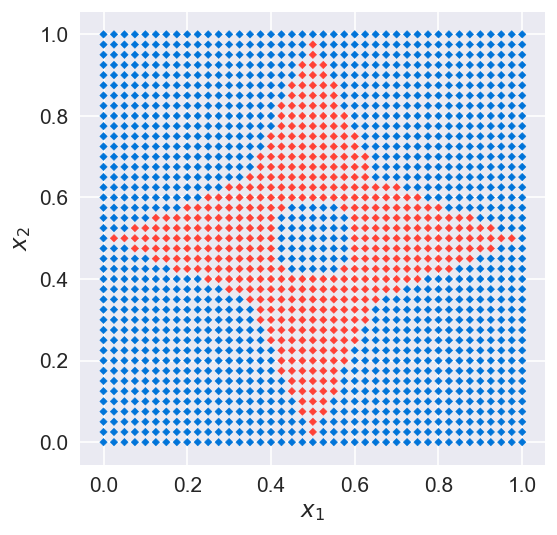

In [18]:
c = [BLUE, RED]
draw_scatter(P, T, c)

### Задание 3

Проинвертируем 10% случайно выбранных ответов:

In [19]:
k = 0.1 # 10%
idx = np.random.binomial(1, k, size=N) == 1 # logical array
Y = T.copy()
Y[idx] = 1 - T[idx]

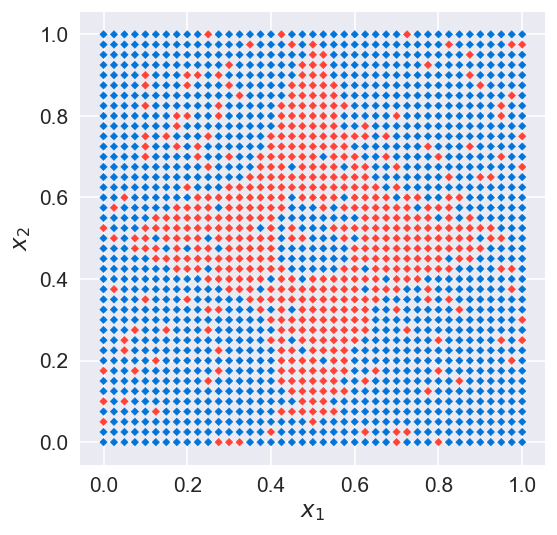

In [20]:
draw_scatter(P, Y, c)

Определим основные показатели качества распознавания:
- матрицу неточностей;
- среднюю вероятность ошибки и среднюю вероятность правильного распознавания;
- ошибки первого и второго рода, чувствительность, специфичность.

In [21]:
def draw_confusion_matrix(mat, w=5, h=3):
    cmap = ListedColormap(sns.color_palette("Blues", 10))
    ax = sns.heatmap(mat, annot=True, fmt="d", linewidths=0.5, cmap=cmap)
    ax.figure.set_size_inches(w, h)
    ax.figure.set_dpi(120)
    ax.xaxis.tick_top()
    ax.set_xticklabels(np.arange(1, mat.shape[0] + 1))
    ax.set_yticklabels(np.arange(mat.shape[1], 0, -1))
    ax.tick_params(axis='both', which='major', labelsize=8)
    save()
    plt.show()

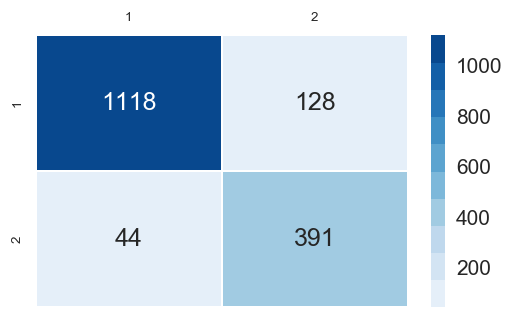

In [22]:
cm = confusion_matrix(T, Y)
draw_confusion_matrix(cm)

In [23]:
print('Средняя вероятность ошибки = {0:.2f}'.format((cm[0][1] + cm[1][0]) / N))
print('Средняя вероятность правильного распознавания = {0:.2f}'.format((cm[0][0] + cm[1][1]) / N))
print('Спецефичность = {0:.2f}'.format(cm[0][0] / N))
print('Чувствительность = {0:.2f}'.format(cm[1][1] / N))
print('Ошибка первого рода = {0:.2f}'.format(cm[0][1] / N))
print('Ошибка второго рода = {0:.2f}'.format(cm[1][0] / N))

Средняя вероятность ошибки = 0.10
Средняя вероятность правильного распознавания = 0.90
Спецефичность = 0.67
Чувствительность = 0.23
Ошибка первого рода = 0.08
Ошибка второго рода = 0.03


### Задание 4

Разделим выборку $(P, T)$ на обучающую и тестовую.

In [24]:
k = 0.33  # 33% for test
X_train, X_test, y_train, y_test = train_test_split(P, T, test_size=k, random_state=42)

In [25]:
def draw_train_and_test_scatter(X_train, X_test, y_train, y_test):
    plt.figure(figsize=(5, 5), dpi=120)
    cmap = ListedColormap([BLUE, RED])
    m = 'D'
    plt.scatter(X_train.T[0], X_train.T[1], c=y_train, s=10, marker=m, cmap=cmap)
    plt.scatter(X_test.T[0], X_test.T[1], c=y_test, s=1, marker=m, cmap=cmap)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    save()
    plt.show()

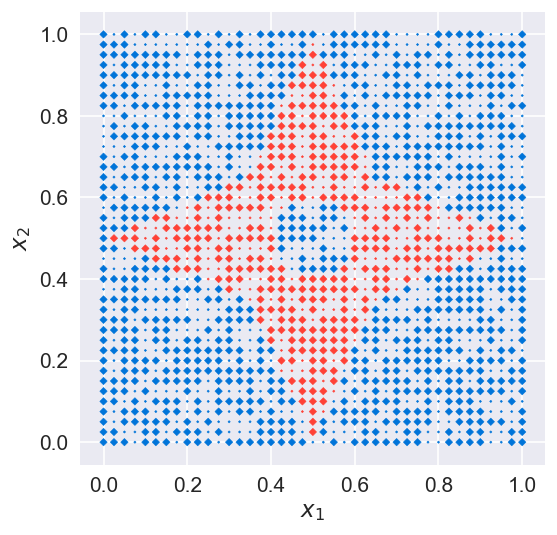

In [26]:
draw_train_and_test_scatter(X_train, X_test, y_train, y_test)

Применим __K-fold__ кроссвалидацию к исходной выборке.

In [27]:
k = 4
kf = KFold(4, shuffle=True, random_state=42)

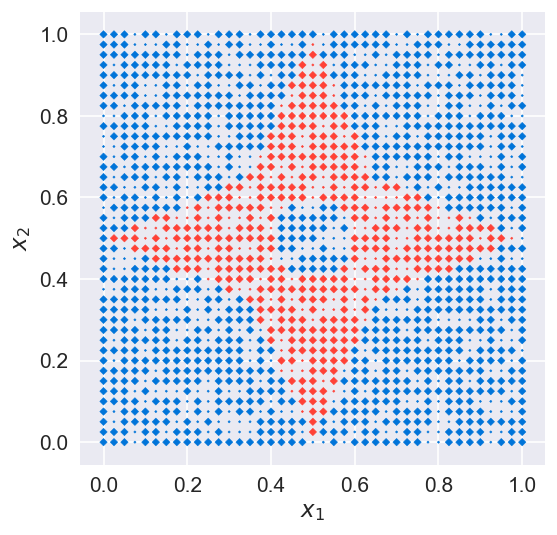

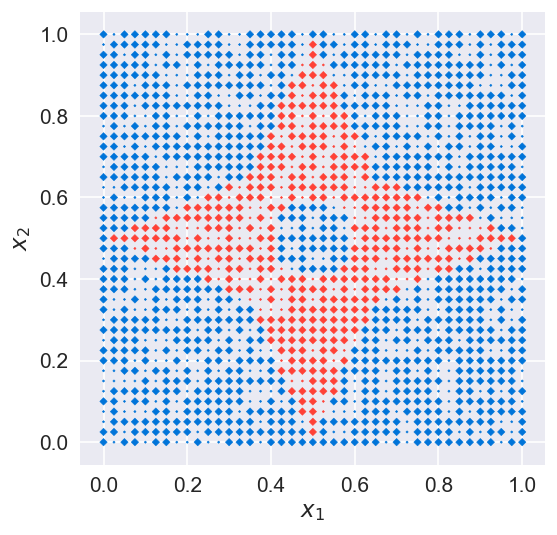

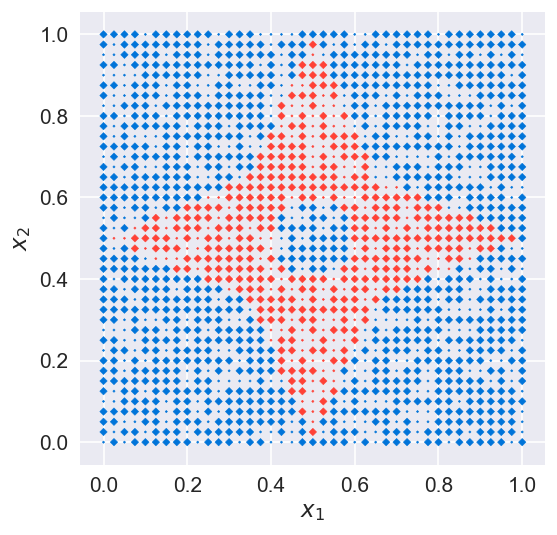

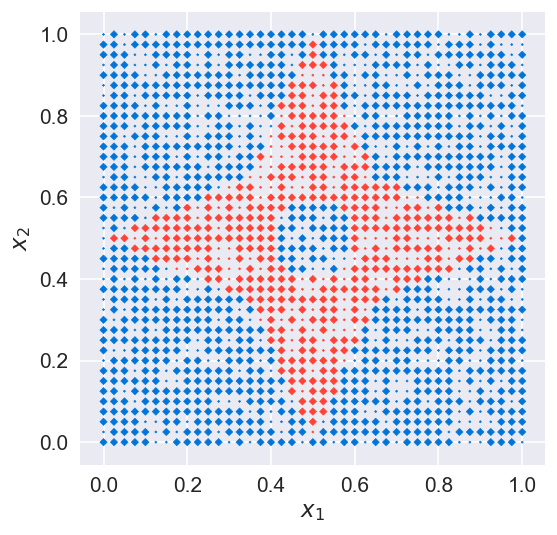

In [28]:
for train_index, test_index in kf.split(P):
    X_train, X_test = P[train_index], P[test_index]
    y_train, y_test = T[train_index], T[test_index]
    
    draw_train_and_test_scatter(X_train, X_test, y_train, y_test)

## №4. Разбиение плоскости на $n$ классов

### Задание 1

In [29]:
def get_position_for_text(polygon):
    coord = polygon.exterior.centroid.coords.xy
    return coord[0][0], coord[1][0]

polygons = {
    1: Polygon([(0, 0), (0, 1), (.4, .8)]),
    2: Polygon([(0, 1), (1, 1), (.8, .6)]),
    3: Polygon([(1, 1), (1, 0), (.6, .2)]),
    4: Polygon([(1, 0), (0, 0), (.2, .4)]),
    5: Polygon([(.2, .4), (.4, .8), (.5, .5)]),
    6: Polygon([(.4, .8), (.8, .6), (.5, .5)]),
    7: Polygon([(.6, .2), (.8, .6), (.5, .5)]),
    8: Polygon([(.2, .4), (.6, .2), (.5, .5)])
}

colors = {
    1: '#0074D9',
    2: '#39CCCC',
    3: '#2ECC40',
    4: '#F012BE',
    5: '#FF851B',
    6: '#FF4136',
    7: '#B10DC9',
    8: '#3D9970',
}

def fun(x):
    x = np.array(x)
    if len(x.shape) == 1:
        point = Point(x[0], x[1])
        for i, p in polygons.items():
            if point.distance(p) < 1e-8:
                return i
    else:
        return np.array([fun(xi) for xi in x])[np.newaxis].T

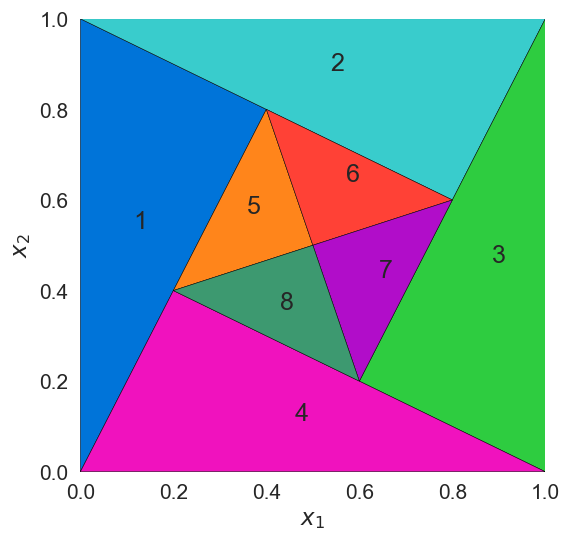

In [30]:
fig = plt.figure(figsize=(5, 5), dpi=120)
ax = fig.add_subplot(111)
for i, p in polygons.items():
    ax.add_patch(PolygonPatch(p, fc=colors[i]))
    ax.annotate(i, xy=get_position_for_text(p), size=15)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
save()
plt.show()

In [31]:
fun([0.9, 0.5]), fun([0.4, 0.6])

(3, 5)

### Задание 2

In [32]:
X = np.linspace(0, 1, 41)
P = np.array(list(itertools.product(X, repeat=2)))
T = fun(P)
N = len(T)

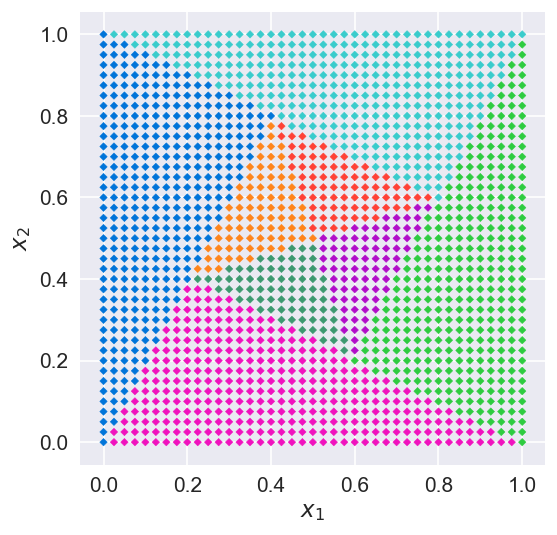

In [33]:
draw_scatter(P, T, colors.values())

### Задание 3

In [34]:
k = 0.1 # 10%
M = len(polygons) # classes
idx = np.random.binomial(1, k, size=N) == 1 # logical array
rnd = np.random.randint(1, M, size=sum(idx))[np.newaxis].T
Y = T.copy()
Y[idx] = rnd

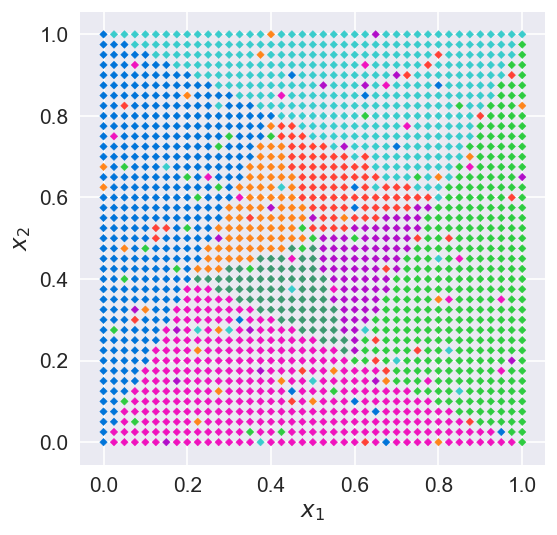

In [35]:
draw_scatter(P, Y, colors.values())

Определим основные показатели качества распознавания:
- матрицу неточностей;
- среднюю вероятность ошибки и среднюю вероятность правильного распознавания;
- ошибки первого и второго рода, чувствительность, специфичность.

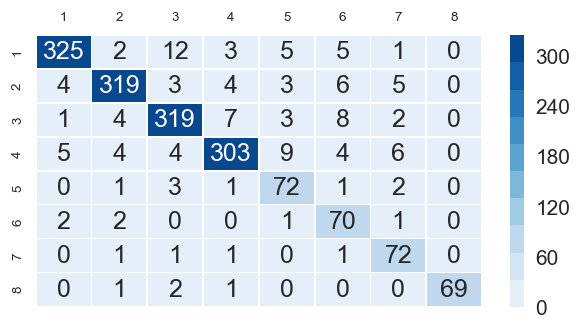

In [36]:
cm = confusion_matrix(T, Y)
draw_confusion_matrix(cm, 6, 3)

In [37]:
print('Средняя вероятность ошибки =', np.sum(np.diag(cm)) / N)
print('Средняя вероятность правильного распознавания =', (np.sum(cm) - np.sum(np.diag(cm))) / N)

Средняя вероятность ошибки = 0.921475312314
Средняя вероятность правильного распознавания = 0.0785246876859


In [38]:
def find_error(x, i):
    return (sum(x) - x[i]) / x[i]

first_type = np.array([find_error(cm.T[i], i) for i in range(M)])
second_type = np.array([find_error(cm[i], i) for i in range(M)])

for i in range(M):
    print('Класс {0}: 1 род = {1:.2f}, 2 род = {2:.2f}'.format(i+1, first_type[i], second_type[i]))

Класс 1: 1 род = 0.04, 2 род = 0.09
Класс 2: 1 род = 0.05, 2 род = 0.08
Класс 3: 1 род = 0.08, 2 род = 0.08
Класс 4: 1 род = 0.06, 2 род = 0.11
Класс 5: 1 род = 0.29, 2 род = 0.11
Класс 6: 1 род = 0.36, 2 род = 0.09
Класс 7: 1 род = 0.24, 2 род = 0.06
Класс 8: 1 род = 0.00, 2 род = 0.06


## №5. Непрерывная функция одной переменной

### Задание 1

In [39]:
def fun(x):
    return (np.sin(50 * x) + np.sin(25 * x) + np.sin(10 * x) + np.cos(10 * x) + \
        np.exp(x - 1) + np.cosh(3 * (1-x)) + np.cosh(3 * x)) / 15

X = np.linspace(0, 1, 500)
Y = fun(X)

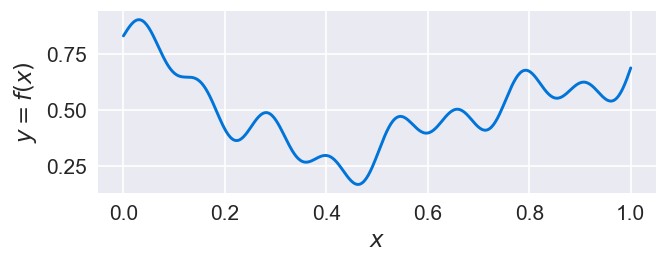

In [40]:
plt.figure(figsize=(6, 2), dpi=120)
plt.plot(X, Y, '-', c=BLUE)
plt.xlabel('$x$')
plt.ylabel('$y=f(x)$')
save()
plt.show()

### Задание 2

In [41]:
N = 100
P = np.linspace(0, 1, N)
T = fun(P)

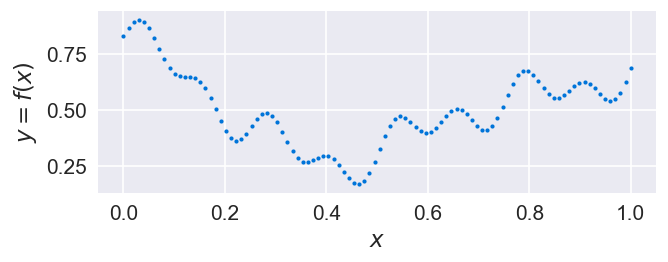

In [42]:
plt.figure(figsize=(6, 2), dpi=120)
plt.plot(P, T, '.', markersize=5, c=BLUE)
plt.xlabel('$x$')
plt.ylabel('$y=f(x)$')
save()
plt.show()

### Задание 3

Добавим к значениям $T$ равномерный шум различной амплитуды.

In [43]:
k = 0.1  # уровень шума
Y = T.copy()
Y += np.random.uniform(-k, k, size=N)

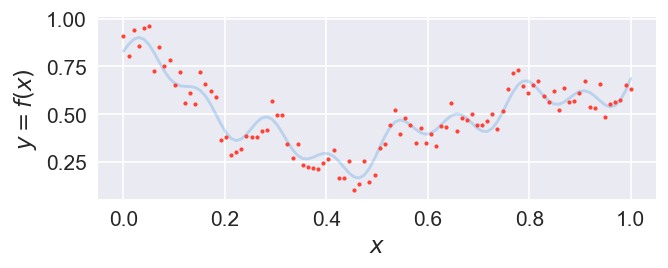

In [44]:
plt.figure(figsize=(6, 2), dpi=120)
plt.plot(P, T, '-', alpha=0.2, c=BLUE)
plt.plot(P, Y, '.', markersize=5, c=RED)
plt.xlabel('$x$')
plt.ylabel('$y=f(x)$')
save()
plt.show()

Определим основные показатели качества распознавания:
- среднюю абсолютную ошибку;
- среднюю относительную ошибку;
- максимальную по модулю ошибку.

In [45]:
error = np.abs(T - Y)
print('Средняя абсолютная ошибка = {0:.4f}'.format(error.mean()))
print('Средняя относительная ошибка = {0:.4f}'.format((error / Y).mean()))
print('Максимальная по модулю ошибка = {0:.4f}'.format(np.max(error)))

Средняя абсолютная ошибка = 0.0506
Средняя относительная ошибка = 0.1276
Максимальная по модулю ошибка = 0.0994


## №6a. Линейная функция с памятью

### Задание 1

Линейная функция с памятью:
$$ y[n] = \sum_{i=0}^{h-1} x[n - i\cdot d]\cdot k_i $$
где $h$ – ширина окна, $d$ – глубина задержек, $k_i$ – коэффициенты.

Зададим коэффициенты: $h = 8, d = 4$, коээфициенты $k_i$:

In [46]:
h = 8
d = 4
sign = [1 if x > 0.5 else -1 for x in np.random.random(size=h)]
k = np.random.random(size=8) * sign
for i in range(len(k)):
    print('k{0} = {1:.3f}'.format(i, k[i]))

k0 = 0.183
k1 = -0.826
k2 = 0.286
k3 = -0.927
k4 = 0.970
k5 = -0.571
k6 = -0.143
k7 = -0.375


In [47]:
def fun(X):
    N = X.shape[0]
    Y = np.zeros(N)
    for n in range(N):
        idx = np.arange(n, n - h * d, -d)
        expr = idx >= 0
        good_idx = idx[expr]
        Y[n] = sum(X[good_idx] * k[expr])
    return Y

### Задание 2

In [48]:
def draw_series(seq, X1, Y1, X2, Y2, X3, Y3):
    alpha = 0.8
    f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
    f.set_size_inches(6, 4)
    f.set_dpi(120)
    ax1.plot(seq, X1, c=BLUE, alpha=alpha)
    ax1.plot(seq, Y1, c=RED, alpha=alpha)
    ax2.plot(seq, X2, c=BLUE, alpha=alpha)
    ax2.plot(seq, Y2, c=RED, alpha=alpha)
    ax3.plot(seq, X3, c=BLUE, alpha=alpha)
    ax3.plot(seq, Y3, c=RED, alpha=alpha)
    ax2.set_ylabel('$y=f(x)$')
    ax3.set_xlabel('$x$')
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    save()
    plt.show()

In [49]:
seq = np.arange(0, 100)
X1 = np.sin(seq / 2)
X2 = np.array([np.random.randint(10) * np.ones(10) for i in np.arange(10)]).flatten()
X3 = np.random.randint(0, 10, 100)

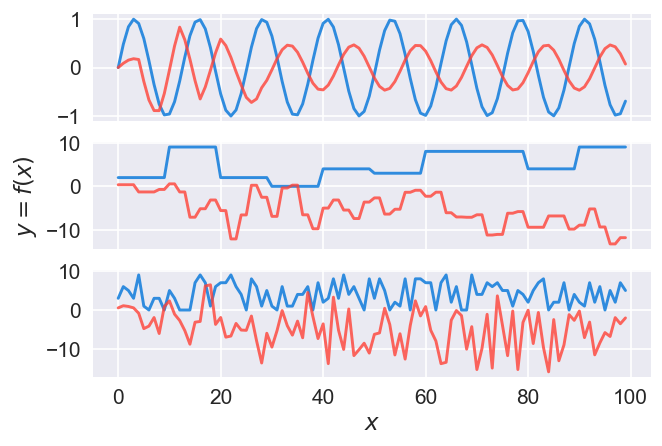

In [50]:
Y1 = fun(X1)
Y2 = fun(X2)
Y3 = fun(X3)

draw_series(seq, X1, Y1, X2, Y2, X3, Y3)

## №6b. Нелинейная функция с памятью

### Задание 1

Нелинейная функция с памятью:
$$ y[n] = f(x[n], x[n - d],..., x[n - (h - 1)\cdot d]) $$
где $h$ – ширина окна, $d$ – глубина задержек

Зададим коэффициенты: $h = 3, d = 2$.

In [51]:
def fun(X):
    N = X.shape[0]
    Y = np.zeros(N)
    for n in range(N):
        idx = np.arange(n, n - h * d, -d)
        expr = idx >= 0
        good_idx = idx[expr]
        Y[n] = np.sqrt(np.sum(np.power(X[good_idx], 2)))
    return Y

### Задание 2

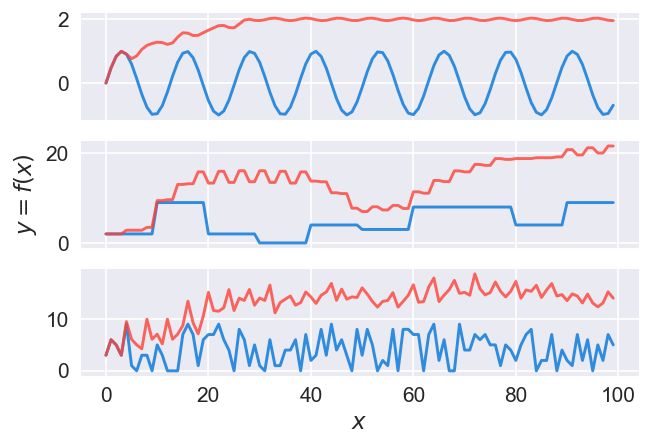

In [52]:
Y1 = fun(X1)
Y2 = fun(X2)
Y3 = fun(X3)

draw_series(seq, X1, Y1, X2, Y2, X3, Y3)

## №7. Линейное разностное уравнение

### Задание 1

In [53]:
z1, z2 = 0.5, -0.5
k1, k2 = 0.25, 0.5

In [54]:
def fun(X):
    N = X.shape[0]
    Y = np.zeros(N)
    Y[0], Y[1] = 0, 1
    for n in range(2, N):
        Y[n] = (z1 + z2) * Y[n-1] - z1 * z2 * Y[n-2] + k1 * X[n] + k2 * X[n-1]
    return Y

### Задание 2

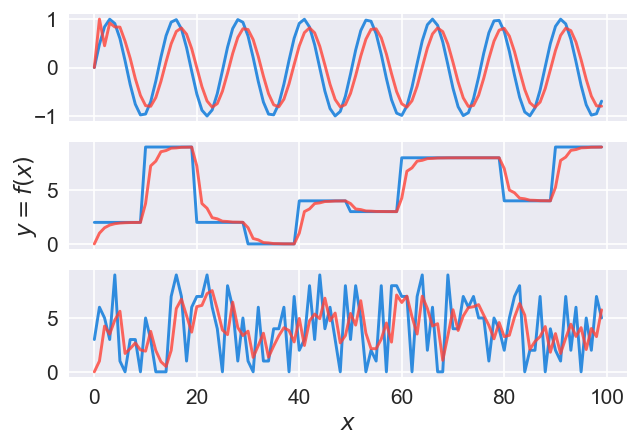

In [55]:
Y1 = fun(X1)
Y2 = fun(X2)
Y3 = fun(X3)

draw_series(seq, X1, Y1, X2, Y2, X3, Y3)

## №8. Многомерные образы

### Задание 1

(1797, 64)


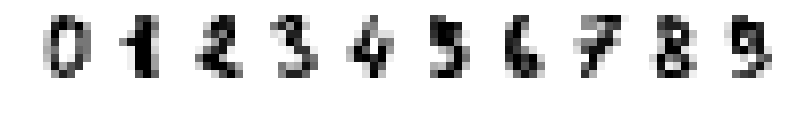

In [56]:
digits = load_digits() # 8x8 pictures
print(digits.data.shape)

fig = plt.figure(figsize=(8, 2), dpi=120)
for i in range(10):
    fig.add_subplot(1, 10, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r)
    plt.axis('off')
save()
plt.show() 

### Задание 2

Зашумим изобрежния.

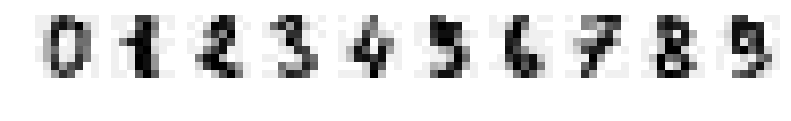

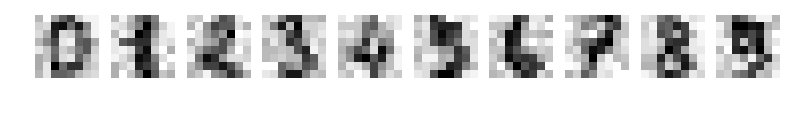

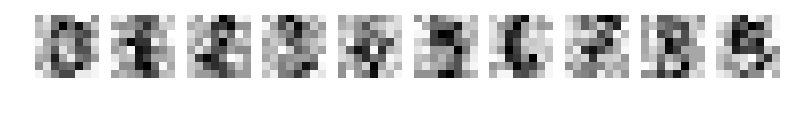

In [57]:
for k in np.arange(1, 10, 3):
    fig = plt.figure(figsize=(8, 2), dpi=120)
    for i in range(10):
        fig.add_subplot(1, 10, i + 1)
        noise = digits.images[i] + np.random.randint(-k, k, size=(8, 8))
        plt.imshow(noise, cmap=plt.cm.gray_r)
        plt.axis('off')
    save()
    plt.show()

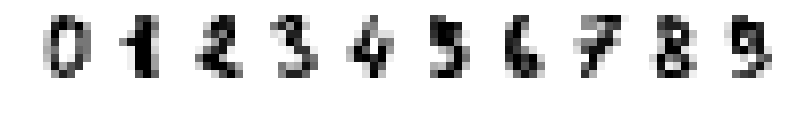

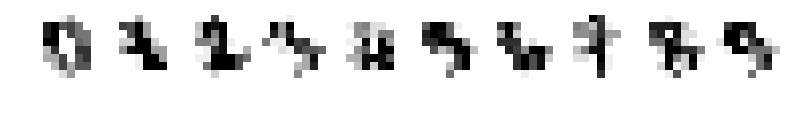

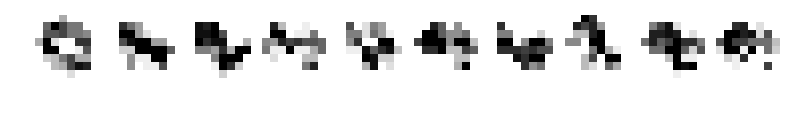

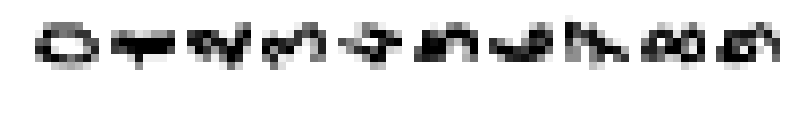

In [58]:
for alpha in np.linspace(0, 90, 4):
    fig = plt.figure(figsize=(8, 2), dpi=120)
    for i in range(10):
        fig.add_subplot(1, 10, i + 1)
        rot = rotate(digits.images[i], alpha, reshape=False, order=0)
        plt.imshow(rot, cmap=plt.cm.gray_r)
        plt.axis('off')
    save()
    plt.show()

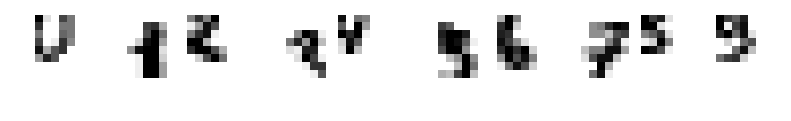

In [59]:
fig = plt.figure(figsize=(8, 2), dpi=120)
for i in range(10):
    fig.add_subplot(1, 10, i + 1)
    s = np.random.randint(-3, 3)
    shifted = shift(digits.images[i], s, prefilter=False, order=0)
    r = np.random.randint(-60, 60)
    rotated = rotate(shifted, r, reshape=False, prefilter=False, order=0)
    plt.imshow(shifted, cmap=plt.cm.gray_r)
    plt.axis('off')
save()
plt.show()